In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv("Updated_Movie_Classification.csv")  # Replace with your path if needed

# Step 3: Drop missing values
df.dropna(inplace=True)

# Step 4: Encode the target variable
label_encoder = LabelEncoder()
df['movie_status'] = label_encoder.fit_transform(df['movie_status'])  # Hit/Not Hit to 1/0

In [9]:
# Step 5: Feature selection and scaling
features = ['score', 'votes', 'runtime', 'budget', 'gross']
X = df[features]
y = df['movie_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


✅ Accuracy: 0.9806807727690893

📊 Classification Report:
               precision    recall  f1-score   support

        Flop       0.98      0.98      0.98       561
         Hit       0.98      0.98      0.98       526

    accuracy                           0.98      1087
   macro avg       0.98      0.98      0.98      1087
weighted avg       0.98      0.98      0.98      1087


🧮 Confusion Matrix:
 [[552   9]
 [ 12 514]]


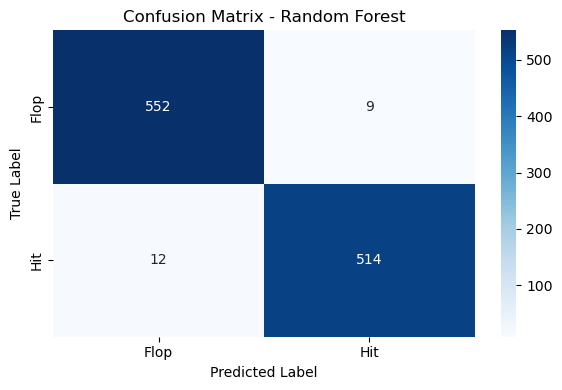

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = rf_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Flop', 'Hit']))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()